# Housing Dataset
## The Goal of this smal project is to explore the dataset, clean it and
## create a simple ML model to predict house prices 
The dataset is download from Kagel and the units of the  Area dosn't play an import role for us! 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
#read the file 
df=pd.read_csv('./Housing.csv',sep=",",encoding="utf-8",engine='python')

In [3]:
# an overview of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# No Null Values , pretty nice ! 
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# any duplicates 
df.drop_duplicates().shape

(545, 13)

 #### No duplicates
 we have here in some columns like Price and Area  a big std,</br>which could mean, we can not create a good model , based on
 the amount of availible data and it's complexity 

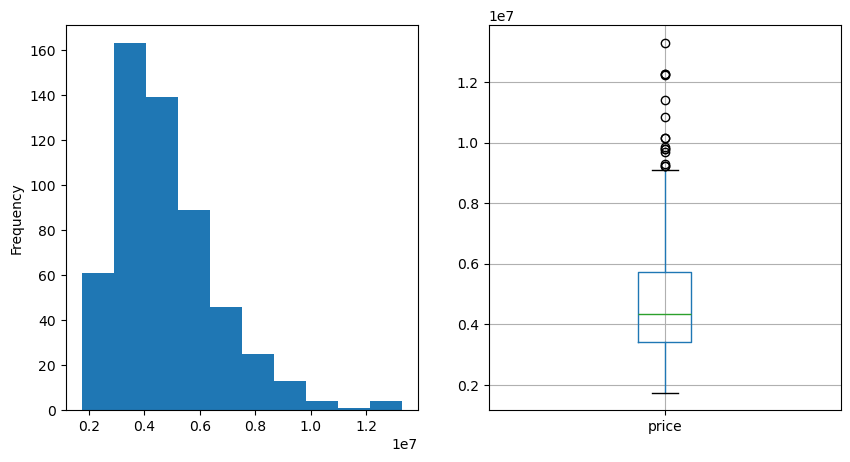

In [7]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['price'].plot.hist(bins=10,ax=axs[0])
df.boxplot(['price'],ax=axs[1])
fig.show()

#### h1  the histogram of the price column shows a right-skewed-distribution and confirms the gussed complexity of the price values. 
#### the boxplot shows many outliers/ unusiaul values above higher boundry of standizated datarange 
#### so we need to handle them , if we want a good model 

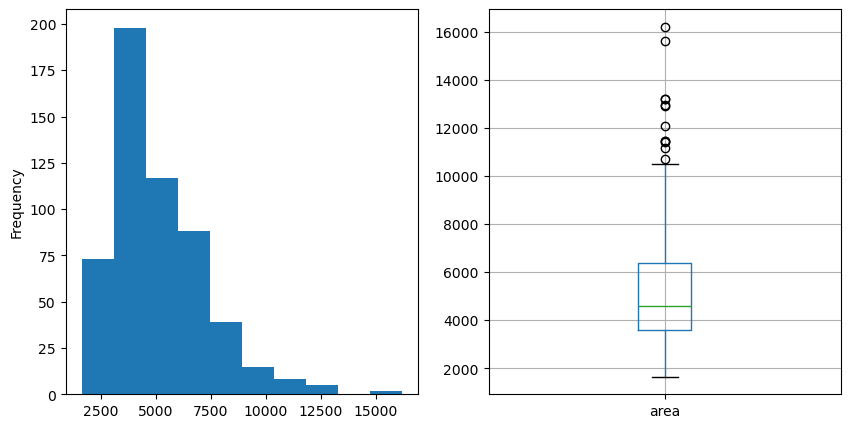

In [8]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['area'].plot.hist(bins=10,ax=axs[0])
df.boxplot(['area'],ax=axs[1])
fig.show()

### By area we see the same phanomen 

In [9]:
# Explore the other numerical and  categorical columns for standardization and formatting  
for column in df.columns[2:]:
    print(f'{column:}-> nr of unique values: {df[column].nunique()} , Values: {list(set(df[column]))}')

bedrooms-> nr of unique values: 6 , Values: [1, 2, 3, 4, 5, 6]
bathrooms-> nr of unique values: 4 , Values: [1, 2, 3, 4]
stories-> nr of unique values: 4 , Values: [1, 2, 3, 4]
mainroad-> nr of unique values: 2 , Values: ['yes', 'no']
guestroom-> nr of unique values: 2 , Values: ['yes', 'no']
basement-> nr of unique values: 2 , Values: ['yes', 'no']
hotwaterheating-> nr of unique values: 2 , Values: ['yes', 'no']
airconditioning-> nr of unique values: 2 , Values: ['yes', 'no']
parking-> nr of unique values: 4 , Values: [0, 1, 2, 3]
prefarea-> nr of unique values: 2 , Values: ['yes', 'no']
furnishingstatus-> nr of unique values: 3 , Values: ['unfurnished', 'furnished', 'semi-furnished']


### our data ist cleaned and do not need a formating 

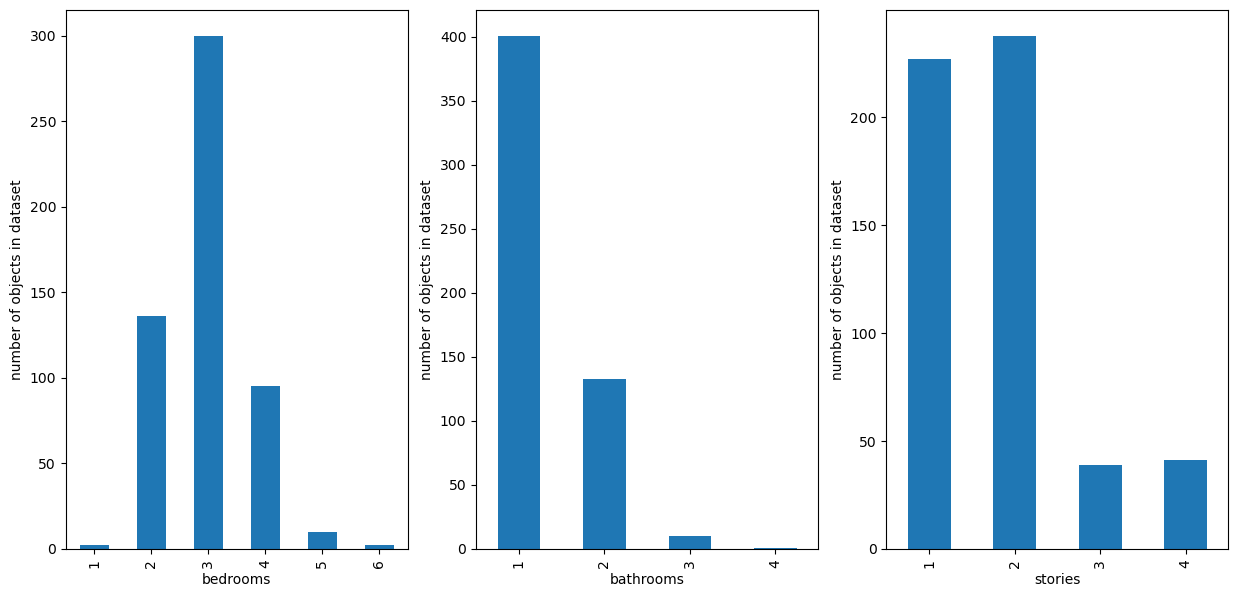

In [10]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(15,7))
df.groupby(by='bedrooms')['price'].count().plot(kind='bar',ax=axs[0],ylabel='number of objects in dataset')
df.groupby(by='bathrooms')['price'].count().plot(kind='bar',ax=axs[1],ylabel='number of objects in dataset')
df.groupby(by='stories')['price'].count().plot(kind='bar',ax=axs[2],ylabel='number of objects in dataset')
fig.show()

### As we can see, if we create a model to predict the house prices with this dataset, the model will be good by predicting house prices
### with 2–4 bedrooms or 1–2 bathrooms...
### For all other cases, the model is not able to make a good prediction !

In [12]:
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


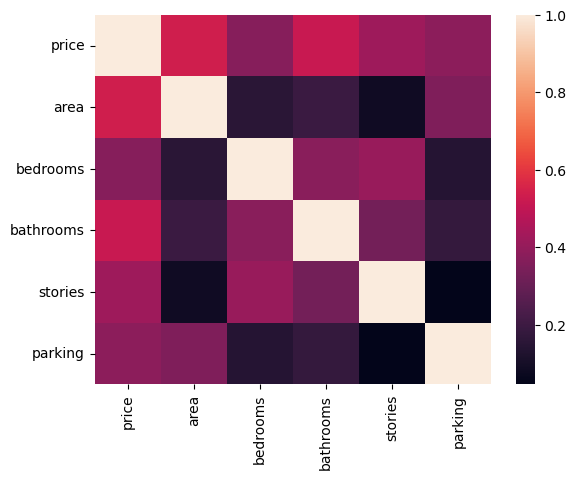

In [13]:
sns.heatmap(df.corr(numeric_only=True));

### As we can see, there is not an important correlation between numeric values and house prices.
### The only semi-correlation  is between area and price, bathrooms and price
 
### Logically  we would think that a bigger house means  a bigger area, and a bigger area means a bigger chance for more bathrooms,  but  there is no correlation between area and bathrooms!!


### Explore categorical values ! 
#### We would also expect that if one house is furnished and has parking or air conditioning, it would be more interesting and expensive.
#### But what tells us the data set ? 

In [15]:
# create nummerocal values from categorical columns
df['furnishingstatus'] = df['furnishingstatus'].astype('category')
df['furn_code']=df['furnishingstatus'].cat.codes.astype('int')
#
df['airconditioning'] = df['airconditioning'].astype('category')
df['air_code']=df['airconditioning'].cat.codes.astype('int')
#
df['prefarea'] = df['prefarea'].astype('category')
df['pref_code']=df['prefarea'].cat.codes.astype('int')
#
df['basement'] = df['basement'].astype('category')
df['base_code']=df['basement'].cat.codes.astype('int')
#
df['mainroad'] = df['mainroad'].astype('category')
df['main_code']=df['mainroad'].cat.codes.astype('int')
#
df['guestroom'] = df['guestroom'].astype('category')
df['guest_code']=df['guestroom'].cat.codes.astype('int')
#
df['hotwaterheating'] = df['hotwaterheating'].astype('category')
df['hot_code']=df['hotwaterheating'].cat.codes.astype('int')
#mainroad
df[df.columns[5:]].head(10)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furn_code,air_code,pref_code,base_code,main_code,guest_code,hot_code
0,yes,no,no,no,yes,2,yes,furnished,0,1,1,0,1,0,0
1,yes,no,no,no,yes,3,no,furnished,0,1,0,0,1,0,0
2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,1,1,0,0
3,yes,no,yes,no,yes,3,yes,furnished,0,1,1,1,1,0,0
4,yes,yes,yes,no,yes,2,no,furnished,0,1,0,1,1,1,0
5,yes,no,yes,no,yes,2,yes,semi-furnished,1,1,1,1,1,0,0
6,yes,no,no,no,yes,2,yes,semi-furnished,1,1,1,0,1,0,0
7,yes,no,no,no,no,0,no,unfurnished,2,0,0,0,1,0,0
8,yes,yes,yes,no,yes,2,yes,furnished,0,1,1,1,1,1,0
9,yes,yes,no,no,yes,1,yes,unfurnished,2,1,1,0,1,1,0


<Axes: xlabel='hot_code'>

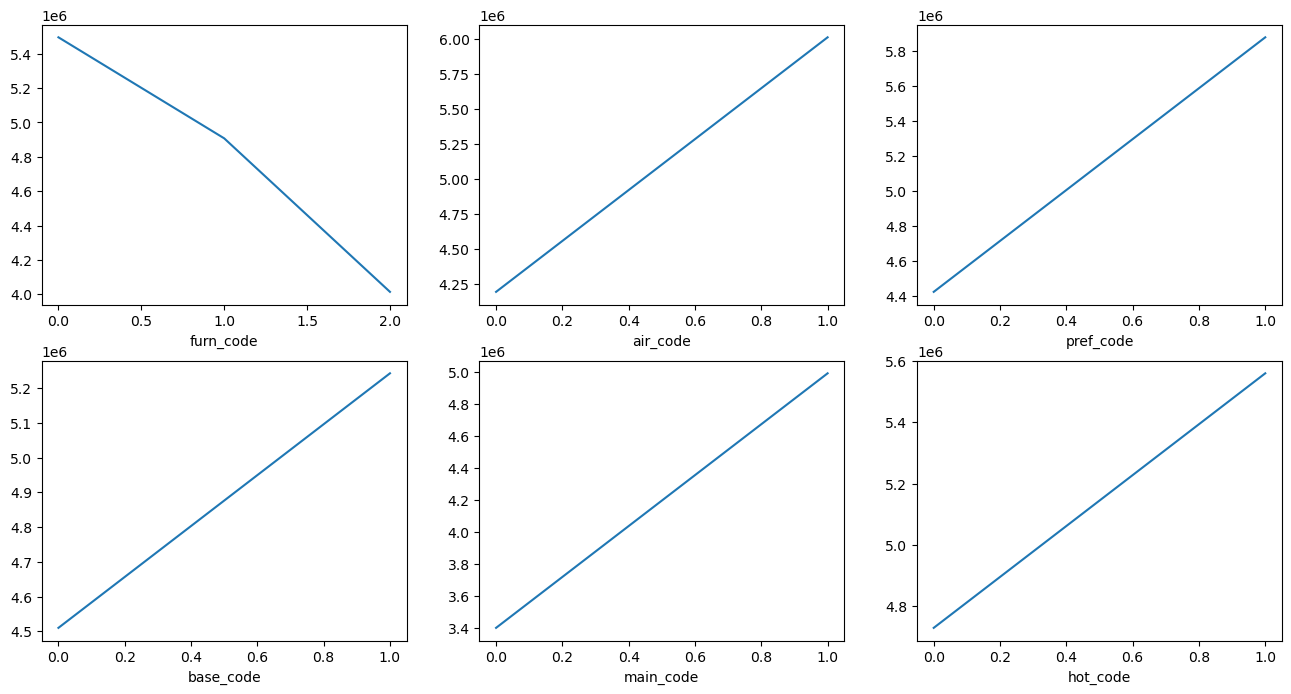

In [16]:
# 
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(16,8))
df.groupby(by='furn_code')['price'].mean().plot(ax=axs[0,0])# 0 -> furnished , 1 -> semi-furnished ,2 unfurnished
df.groupby(by='air_code')['price'].mean().plot(ax=axs[0,1])# 0 -> no, 1 -> yes 
df.groupby(by='pref_code')['price'].mean().plot(ax=axs[0,2])# 0 -> no, 1-> yes 
df.groupby(by='base_code')['price'].mean().plot(ax=axs[1,0])# 0 -> no, 1-> yes
df.groupby(by='main_code')['price'].mean().plot(ax=axs[1,1])# 0 -> no, 1-> yes 
df.groupby(by='hot_code')['price'].mean().plot(ax=axs[1,2])# 0 -> no, 1-> yes 

### As we expected, the columns are in correlation with the average price of a house, but the more interesting column is the furn_code. 
#### How much more expensive are the semi-furnished houses than the unfurnished houses with the same attributes? Is it worth it to furnish a house before selling it? 
#### To answer this question, we must create groups from columns like area and bathroom/bedroom  to compare them (an interesting Task for Tableau).



## Train a  linear Regression model with uncleaned and clead Data 

### The goal ist to demostraed the importance of data expolring and data normalization 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# drop columns with strings and create a datast
cat=df.select_dtypes(exclude='int')
cat.columns
dataset= df.drop(labels=cat.columns,axis=1)
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,parking,furn_code,air_code,pref_code,base_code,main_code,guest_code,hot_code
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,0
1,12250000,8960,4,4,4,3,0,1,0,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,1,1,0,0


In [19]:
# create dataset for training and test
X=dataset.drop(labels='price',axis=1)
Y=dataset['price']

In [20]:
# standardization of data 
sc=StandardScaler()
sc.fit(X=X);
X_transformed=sc.transform(X=X)
# splite the dataset to train and test
x_train, x_test, y_train, y_test= train_test_split(X_transformed,Y,test_size=0.21, random_state=1222)

In [21]:
# LinearRegression model for forecast the house prices
model=LinearRegression()
model.fit(x_train,y_train)
R2_score=model.score(x_test,y_test)
print("R2_score: ", R2_score)
pred=model.predict(x_test)
mse=mean_squared_error(y_test,pred)
print("Loss-Value : ",mse)
#print("R2_score : ",r2_score(y_test,pred))

R2_score:  0.7072075714300097
Loss-Value :  1309826783788.7756


### The Loss value is calculated with MSE, and this algorithm is not really robust for outliers, and we have some outliers! 
### Now we try it without outliers: 
- The intuitive way is to just go and delete rows that have more than 3 Bathrooms or 5 bedrooms.
- Another way is to calculate the z-score or using Inter-Quantile-Range(IQR),
- I will use the IQR-Method, because we used the Box-plot to see the outliers!

In [22]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furn_code,air_code,pref_code,base_code,main_code,guest_code,hot_code
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,1,1,0,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,1,0,0,1,0,0


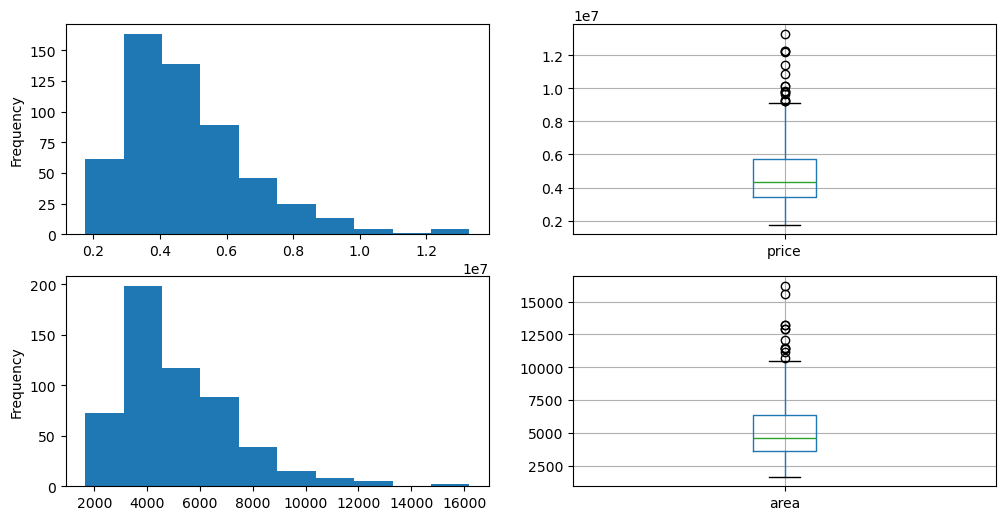

In [23]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,6))
df['price'].plot.hist(bins=10,ax=axs[0,0])
df.boxplot(['price'],ax=axs[0,1])
df['area'].plot.hist(bins=10,ax=axs[1,0])
df.boxplot(['area'],ax=axs[1,1])
fig.show()

In [24]:
def calc_iqr(col):
    '''
    function to calculate lower and upper limit for drop 
    outliers of columns 
    based on IRQ-method
    col: column of pandas dataframe

    return: 
    lower and upper limit 
    '''
    q1=np.percentile(col,25)
    q3=np.percentile(col,75)
    iqr=q3 - q1
    lower_bound= q1 - ( 1.5 * iqr)
    higher_bound=q3 + (1.5 * iqr)
    return lower_bound,higher_bound

In [30]:
#! Price
# we have only prblem with higher prices so we need only higher_boundry
lower_b,higher_b=calc_iqr(df['price'])
df_cleaned=df[df['price'] < higher_b]
#! Area
# we have only prblem with higher area so we need only higher_boundry
lower_b,higher_b=calc_iqr(df_cleaned['area'])
df_cleaned=df_cleaned[df_cleaned['area'] < higher_b]
print(f' with outliers {df.shape} ,without outliers{df_cleaned.shape}')

 with outliers (545, 20) ,without outliers(517, 20)


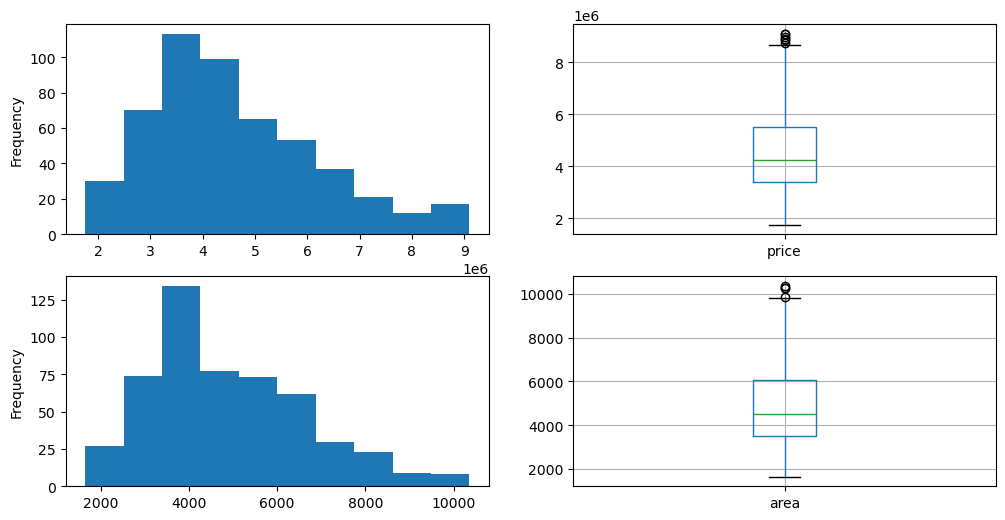

In [31]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,6))
df_cleaned['price'].plot.hist(bins=10,ax=axs[0,0])
df_cleaned.boxplot(['price'],ax=axs[0,1])
df_cleaned['area'].plot.hist(bins=10,ax=axs[1,0])
df_cleaned.boxplot(['area'],ax=axs[1,1])
fig.show()

In [33]:
# create numeric values  from  not numerical columns 
df_cleaned['furnishingstatus'] = df_cleaned['furnishingstatus'].astype('category')
df_cleaned['furn_code']=df_cleaned['furnishingstatus'].cat.codes.astype('int')
#
df_cleaned['airconditioning'] = df_cleaned['airconditioning'].astype('category')
df_cleaned['air_code']=df_cleaned['airconditioning'].cat.codes.astype('int')
#
df_cleaned['prefarea'] = df_cleaned['prefarea'].astype('category')
df_cleaned['pref_code']=df_cleaned['prefarea'].cat.codes.astype('int')
#
df_cleaned['basement'] = df_cleaned['basement'].astype('category')
df_cleaned['base_code']=df_cleaned['basement'].cat.codes.astype('int')
#
df_cleaned['mainroad'] = df_cleaned['mainroad'].astype('category')
df_cleaned['main_code']=df_cleaned['mainroad'].cat.codes.astype('int')
#
df_cleaned['guestroom'] = df_cleaned['guestroom'].astype('category')
df_cleaned['guest_code']=df_cleaned['guestroom'].cat.codes.astype('int')
#
df_cleaned['hotwaterheating'] = df_cleaned['hotwaterheating'].astype('category')
df_cleaned['hot_code']=df_cleaned['hotwaterheating'].cat.codes.astype('int')

#
cat=df_cleaned.select_dtypes(exclude='int')
cat.columns
dataset= df_cleaned.drop(labels=cat.columns,axis=1)
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,parking,furn_code,air_code,pref_code,base_code,main_code,guest_code,hot_code
15,9100000,6000,4,1,2,2,1,0,0,1,1,0,0
16,9100000,6600,4,2,2,1,2,1,1,1,1,1,0
17,8960000,8500,3,2,4,2,0,1,0,0,1,0,0


In [34]:
# create dataset for training and test
X=dataset.drop(labels='price',axis=1)
Y=dataset['price']
# standardization of data 
sc=StandardScaler()
sc.fit(X=X);
X_transformed=sc.transform(X=X)
# splite the dataset to train and test
x_train, x_test, y_train, y_test= train_test_split(X_transformed,Y,test_size=0.21, random_state=1222)
#
model=LinearRegression()
model.fit(x_train,y_train)
R2_score=model.score(x_test,y_test)
print("R2_score: ", R2_score)
pred=model.predict(x_test)
mse=mean_squared_error(y_test,pred)
print("Loss-Value : ",mse)
#print("R2_score : ",r2_score(y_test,pred))

R2_score:  0.6405207037942972
Loss-Value :  921596464022.4615


## As we can see, we have a better loss value, because we got rid of some outliers.
### The main problem is still the unbalanced dataset!
### The size of the dataset and its variety are not good enough to train an ML model

# create some columns for Tableau 
## the main point of this task will be create groups of meaningful and representative values along all columns 
## to show the relation between different group of values and the price of houses! 

In [44]:
df_cleaned.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furn_code,air_code,pref_code,base_code,main_code,guest_code,hot_code
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,1,0,0,1,1,0,0
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,2,1,1,1,1,1,0
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,0,1,0,0,1,0,0


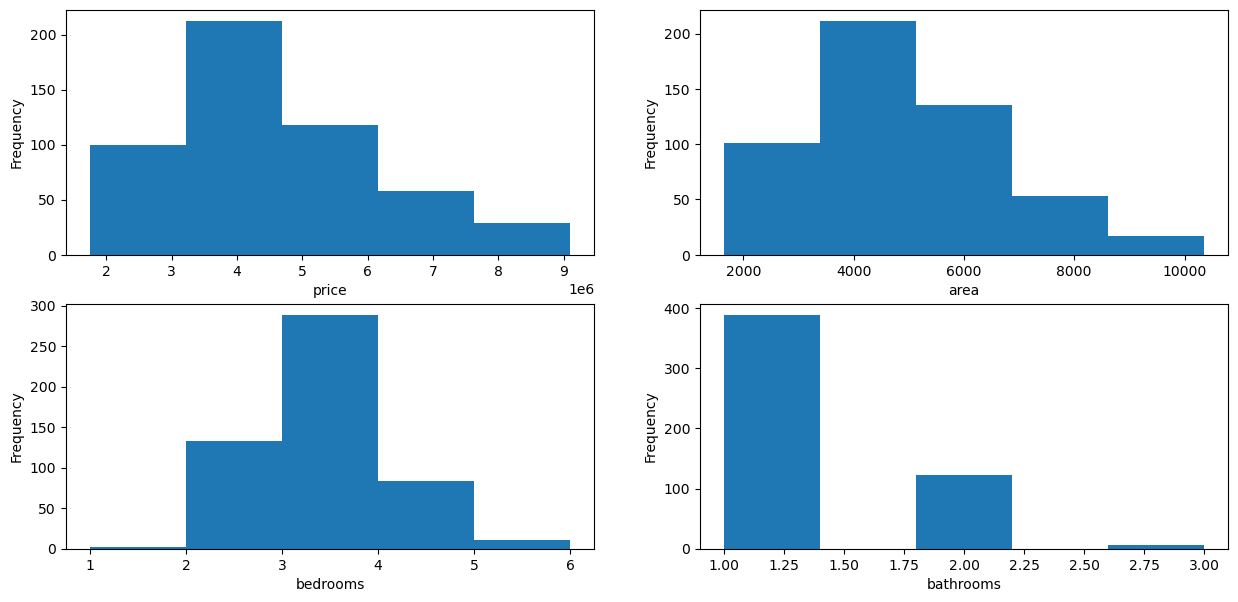

In [61]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,7))
df_cleaned['price'].plot.hist(bins=5,ax=axs[0,0],xlabel='price')
df_cleaned['area'].plot.hist(bins=5,ax=axs[0,1],xlabel='area')
df_cleaned['bedrooms'].plot.hist(bins=5,ax=axs[1,0],xlabel='bedrooms')
df_cleaned['bathrooms'].plot.hist(bins=5,ax=axs[1,1],xlabel='bathrooms')
fig.show()

In [ ]:
# looking at plots, we can create UpTo3Mio, MoreThan3LessThan5Mio, MoreThan5LessThen7.5Mio and More than 7.5Mio
# Fore area , UpTo3.5K,3.5K-5K , 5K-7K, 7KandMore
# bedrooms lessThan2,2-4, Morethan4
# Bathrooms  One, LessThan2 or 3
df_cleaned['price_grouped']=

In [66]:
3e6

3000000.0

In [76]:
def price_group(price):
    """
    function to create groups from price ranges
    parameter: 
    price : int 
    """
    group=''
    g1=3e6
    g2=5e6
    g3=7.5e6
    if price < g1:
        group='UpTo3Mio'
    elif price >=  g1 and price < g2:
        group='UpTo5Mio'
    elif price>g2 and price <g3 : 
        group='UpTo7.5Mio'
    else: 
        group='7.5MioAndMore'
    return group

In [79]:
def area_group(area):
    """
    function to create groups from area ranges
    parameter: 
    area : int 
    """
    group=''
    g1=3.5e3
    g2=5e3
    g3=7e3
    if area < g1:
        group='UpTo3.5K'
    elif area >=  g1 and area < g2:
        group='UpTo5K'
    elif area>g2 and area < g3 : 
        group='UpTo7K'
    else: 
        group='7KandMore'
    return group

In [82]:
def bathrooms_group(bathrooms):
    """
    function to create groups from bathrooms ranges
    parameter: 
    bathrooms : int 
    """
    group=''
    g1=2
    g2=4
    if bathrooms <= g1:
        group='UpTo2'
    elif bathrooms >  g1 and bathrooms <= g2:
        group='UpTo4'
    else: 
        group='4AndMore'
    return group

In [83]:
df_cleaned['price_grouped'] = df_cleaned['price'].apply(price_group)
df_cleaned['area_grouped']=df_cleaned['area'].apply(area_group)
df_cleaned['bathrooms_grouped']=df_cleaned['bathrooms'].apply(bathrooms_group)

In [84]:
df_cleaned.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,furn_code,air_code,pref_code,base_code,main_code,guest_code,hot_code,price_grouped,area_grouped,bathrooms_grouped
15,9100000,6000,4,1,2,yes,no,yes,no,no,...,1,0,0,1,1,0,0,7.5MioAndMore,UpTo7K,UpTo2
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,...,2,1,1,1,1,1,0,7.5MioAndMore,UpTo7K,UpTo2


In [85]:
# Save the csv file to import into Tableau Public
df_cleaned.to_csv('./cleaned_housing.csv')